### EXAMEN TP

---

Realisé par : EL FATHI Zakaria<br>
Encadré par : Pr. Aghrich Ahmed
<h6>AU : 2022/2023</h6>

---

1.  Répertoire de travail

In [1]:
import os
os.chdir("C:\\Users\\EliteBooK\\Desktop\\examTP")

---

2. Complément sur les tableaux Numpy

<h6>manipulation de tableaux "standard" de type list</h6>

In [2]:
T=[[0,1],[2,3]] # des tableaux dont les éléments sont des tableaux.
U=[[4,5],[6,7]]
print(T+U) # concaténation
print(2*T) # concaténation

[[0, 1], [2, 3], [4, 5], [6, 7]]
[[0, 1], [2, 3], [0, 1], [2, 3]]


<h6>manipulation de tableaux Numpy</h6>

In [3]:
import numpy as np
T=np.array(T) # conversion en tableau numpy.
U=np.array(U)
print(T+U) # addition terme à terme.
print(2*T) # multiplication de tous les éléments par 2.

[[ 4  6]
 [ 8 10]]
[[0 2]
 [4 6]]


<h6>on remarque qu’avec des tableaux numpy, le produit T*U ne produit pas d’erreur et a bien un sens ici : celui du produit
terme à terme des tableaux, comme pour l’addition.
Attention, pour avoir un sens, les opérations précédentes doivent se faire sur des tableaux ayant même taille :</h6>

In [4]:
T=np.array([[0,1],[2,3],[4,5]])
U=np.array([[4,5],[6,7]])
print(T+U) #addition d'un tableau 3*2 avec un tableau 2*2: erreur.

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

<h6> Accés à, ou modification d'un élément d’un tableau numpy, c’est comme avec des tableaux standard,</h6>

In [ ]:
T=np.array([[0,1],[2,3],[4,5]])
print(T[1])
print(T[1][0])
T[2][0]=10
print(T)


[2 3]
2
[[ 0  1]
 [ 2  3]
 [10  5]]


<h6>Pour copier un tableau dans une nouvelle variable, il faut utiliser la fonction copy de Numpy</h6>

In [ ]:
T=np.array([[0,1],[2,3],[4,5]])
T2=T # si un élément de T ou T2 est modifié alors cette modification sera aussi appliquée à l'autre
# tableau: T et T2 sont deux références vers le même tableau en mémoire.
T3=np.copy(T) # si un élément de T ou T3 est modifié alors cette modification ne sera pas visible sur
# l'autre tableau: les éléments ont été recopiés ailleurs en mémoire.
T[0][0]=6
print(T)
print(T2)
print(T3)


[[6 1]
 [2 3]
 [4 5]]
[[6 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]


---

3. Décomposition d’une image en pixels

<h6>Récupération d’une liste de pixels sous forme de tableau 3D</h6>

In [ ]:
from PIL import Image #importation du sous-module Image du module PIL
im=Image.open(".//images//lena_color.png") #ouverture d'une image au format png dans Python.
tab=np.array(im)

In [ ]:
print(tab) #contrairement aux tableaux usuels, tout n'est pas affiché (heureusement !)
print(im.size) #im.size renvoie la taille de l'image (largeur x hauteur)
print(len(tab)) #nb de sous-tableaux de tab, c'est-à-dire nombre de lignes sur l'image
print(len(tab[0])) #nb de sous-sous-tableaux de tab, c'est-à-dire nombre de colonnes
print(len(tab[0][0])) #nb de couleurs additives utilisées, ici 3 : R, V et B
print(tab.shape) #renvoie un tuple contenant les éléments précédents (h, l, 3)


[[[191 102  73]
  [189 101  72]
  [190 103  74]
  ...
  [130  71  51]
  [130  72  54]
  [130  72  54]]

 [[190 103  73]
  [191 104  74]
  [190 103  73]
  ...
  [133  73  54]
  [133  75  55]
  [131  73  53]]

 [[191 105  69]
  [188 103  69]
  [188 103  72]
  ...
  [134  74  55]
  [133  74  54]
  [135  76  56]]

 ...

 [[103  73  71]
  [121  95  92]
  [133 109 105]
  ...
  [ 67  35  36]
  [ 65  35  36]
  [ 64  32  33]]

 [[112  82  79]
  [121  95  90]
  [136 112 106]
  ...
  [ 65  34  33]
  [ 64  34  34]
  [ 69  36  35]]

 [[113  82  78]
  [121  94  88]
  [139 115 108]
  ...
  [ 61  31  29]
  [ 67  38  35]
  [ 79  46  44]]]
(256, 256)
256
256
3
(256, 256, 3)


<h6>Obtenir une image à partir d’un tableau</h6>

In [ ]:
nouvelle_image=Image.fromarray(tab)
nouvelle_image.show() # pour afficher l'image
nouvelle_image.save("nom_de_la_nouvelle_image.png") # pour l'enregistrer au format voulu


---

4. À vous de jouer

In [ ]:
from PIL import Image
import numpy as np
def image_noire(im):
    t=np.array(im)
    n,p,r=t.shape #on sait que r=3
    for i in range(n):
        for j in range(p):
            for k in range(3):
                t[i][j][k]=0
    return Image.fromarray(t)

<h6>Remarquez que 0*t aurait également créé un tableau de même taille rempli de zéros, mais on fera souvent usage de
telles boucles imbriquées dans ce TP. Une utilisation peut-être :</h6>

In [ ]:
lena_noire=image_noire(im)
lena_noire.save(".//output//lena_noire.png") #sauvegarde
lena_noire.show() #affichage


---

4.1 Décomposition d’une image en ses composantes


### Question 1

<h6>Ecrire une fonction composante_rouge(im) retournant la composante rouge de l’image passée en paramètre. Servez-vous en pour calculer la composante rouge de lena.png et sauvegardez-là</h6>

In [ ]:
def composante_rouge(im):
    t=np.array(im)
    n,p,r=t.shape #on sait que r=3
    for i in range(n):
        for j in range(p):
            for k in range(1,3):
                t[i][j][k]=0
    return Image.fromarray(t)

In [ ]:
lena_rouge=composante_rouge(im)
lena_rouge.save("./output//lena_rouge.png") #sauvegarde
lena_rouge.show() #affichage

---

4.2 Négatif d’une image


### Question 2
Écrire une fonction negatif(im) retournant l’image négative de l’image passée en paramètre.

In [ ]:
def img_negatif(im):
    t=np.array(im)
    n,p,r=t.shape #on sait que r=3
    for i in range(n):
        for j in range(p):
            for k in range(3):
                t[i][j][k]=255-t[i][j][k]
    return Image.fromarray(t)

In [ ]:
lena_neg=img_negatif(im)
lena_neg.save(".//output//lena_negative.png") #sauvegarde
lena_neg.show() #affichage

---

4.3 Mise en place d’un cadre autour d’une image

### Question 3
 Écrire une fonction cadre_noir(im,ep) prenant en entrée une image, ainsi qu’un (petit) entier ep,
renvoyant une nouvelle image, identique à la précédente mais dont les pixels situés sur les bords de l’image ont été
remplacés par des pixels noirs, sur une épaisseur ep.

In [ ]:
def cadre_noir(im,ep):
    t=np.array(im)
    n,p,r=t.shape
    for x in range(n):
        for y in range(p):
            if (x<ep or y<ep or x>n-ep-1 or y>p-ep-1):
                t[x,y] = (0,0,0)
    return Image.fromarray(t)

In [ ]:
cadre_noi=cadre_noir(im, 20)
cadre_noi.save(".//output//lena_cadre.png") #sauvegarde
cadre_noi.show() #affichage

---

4.4 Rajout d’un cadre autour de l’image

### Question 4
Écrire une fonction rajout_cadre(im,ep) fonctionnant comme précédemment, mais retournant une
image de taille (h + 2ep, ` + 2ep) (si l’image initiale a pour taille (h, `)), le cadre ayant été ajouté à l’extérieur plutôt
que par modification des pixels du bord. 


In [ ]:
import cv2
from matplotlib import pyplot as plt

def rajout_cadre(im,ep):
    black = [0,0,0]
    path = r".//Images//lena_color.png"
    img1 = cv2.imread(path)

    lena= cv2.copyMakeBorder(img1,ep,ep,ep,ep,cv2.BORDER_CONSTANT,value=black)
    cv2.imwrite('.//output//lena_cadre.png',lena)
    plt.imshow(lena)

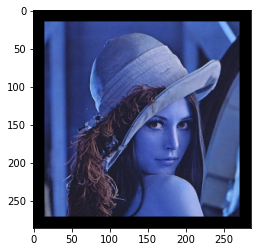

In [ ]:
from PIL import Image
im=Image.open(".//Images//lena_color.png")
rajout_cadre(im,15)

---

4.5 Conversion d’une image couleur en image en niveau de gris

### Question 5
Ecrire une fonction niveau_gris(im) renvoyant une nouvelle image, en niv

In [ ]:
def rgbTOgris(img) :
    t=np.array(im)
    gray=[]
    n,p,r=t.shape #on sait que r=3
    gray=[[None for i in range(p)]for j in range(n)]
    for i in range(n):
        for j in range(p):        
            t[i][j]=0.299*t[i][j][0]+0.587*t[i][j][1]+0.114*t[i][j][2]
    return Image.fromarray(t)

In [ ]:
to_grey=rgbTOgris(im)
to_grey.save(".//output//lena_gris.png") #sauvegarde
to_grey.show() #affichage

---

4.6 Image au format « B »


### Question 6.
Ecrire une fonction niveau_gris2(im) faisant la même chose que la fonction niveau_gris(im), mais
renvoyant une image au format « B » et non plus « RGB »

In [ ]:
def niveau_gris(img) :
    t=np.array(im)
    gray=[]
    n,p,r=t.shape #on sait que r=3
    gray=[[None for i in range(p)]for j in range(n)]
    for i in range(n):
        for j in range(p):        
            t[i][j]=0.299*t[i][j][0]+0.587*t[i][j][1]+0.114*t[i][j][2]
    return Image.fromarray(t)

In [ ]:
lena_gris=niveau_gris(im)

lena_gris.save(".//output//lena_gris.png") #sauvegarde
lena_gris.show() #affichage

---

4.7 Pixellisation d’une image


### Question 7.
Écrire une fonction pixellisation(im,n) prenant en entrée une image et un entier n > 1 définissant
la largeur des carrés sur laquelle la moyenne des couleurs est effectuée. Cette fonction retourne une nouvelle image,
pixellisée

In [ ]:
def pixellisation(im,n) :
    t=np.array(im)
    n,p,r=t.shape #on sait que r=3
    for i in range(n//n): # // correspond à la division entière en Python
        for j in range(p//n):
            for k in range(n):
                for l in range(n):
                    t[i+n][j+n][0]=t[i+n][j:n][0].avg()
                    t[i+n][j+n][1]=t[i+n][j:n][1]
                    t[i+n][j+n][2]=t[i+n][j:n][2]
                    



print(np.array(im).shape)

(256, 256, 3)


---

4.8 Histogramme d’une image


### Question 8.
Écrire une fonction histo(im), qui prend en argument une image en niveau de gris au format « B »
(décrite par une matrice dont chaque pixel est représenté seulement par le niveau de gris). Cette fonction doit renvoyer
une liste de taille 256 : en première position (indice 0), le nombre de pixels noirs (gris 0), en deuxième position (indice
1), le nombre de pixels gris 1, . . . , en dernière position (255), le nombre de pixels blancs (gris 255).
Appliquez votre code à l’image lena_gris2.png, préalablement chargée. Vous utiliserez ensuite le module matplotlib
pour tracer l’histogramme.
Une image qui a un histogramme tout à gauche, c’est-à-dire une image très sombre, est image dite « bouchée ». Une
image qui a un histogramme tout à droite, c’es-à-dire une image avec des lumières très vives, est image dite « brûlée ».

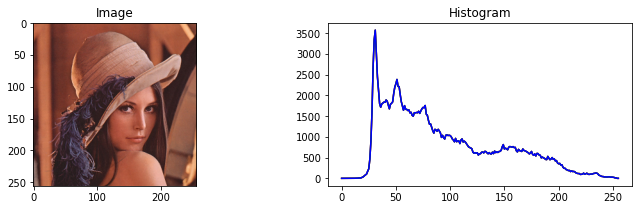

In [ ]:
def histo(im):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(im)
    axis[1].set_title('Histogram')
    axis[0].set_title('Image')
    rgbcolors = ['red', 'green', 'blue']
    for i,col in enumerate(rgbcolors):
        hist,bin = np.histogram(np.array(im).ravel(),256,[0,255])
        axis[1].plot(hist,color = col)
    plt.show()

histo(im)

---

4.9 Modifier la luminosité d’une image


### Question 9.
Écrire une fonction change_luminosite(im,d), qui prend en argument une image en niveau de gris
décrite par une matrice dont chaque pixel est représenté seulement par le niveau de gris et un entier entre 0 et 255,
valeur du décalage du niveau de gris. Cette fonction renvoie une nouvelle image. Attention : on prendra garde que si
l’on essaie de mettre un entier dans un tableau dont les éléments sont de type uint8, celui-ci est pris modulo 256. On
convient que pour une valeur de pixel p, si p + d > 255 il faut stocker 255, et si p + d < 0, il faut stocker 0.


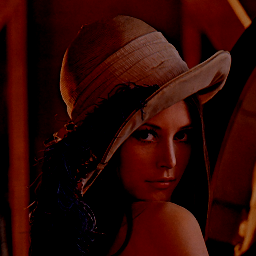

In [ ]:
# chager lunimosité 
def change_luminosite(im,d):
    t=np.array(im)
    n,p,r=t.shape #on sait que r=3
    m=np.where(t<d,0,t-d)
    for i in range(n):
        for j in range(p):
            for k in range(3): 
              t[i][j][k]= m[i][j][k]
    return Image.fromarray(t,'RGB')


lena_lum=change_luminosite(im, 100)
lena_lum.save(".//output//lena_luminosite.png") #sauvegarde
lena_lum.show() #affichage
change_luminosite(im, 100)